In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [23]:
data1 = "market.csv"
data2 = "ID_data.csv"
df_market = pd.read_csv(data1,sep=',',encoding='shift_jis')
df_id = pd.read_csv(data2,sep=',',encoding='shift_jis')

In [24]:
df_market.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [25]:
df_id.head()

,顧客ID,性別,年代
0,1001,2,70
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40


In [26]:
df = pd.merge(df_market,df_id, how='left', on='顧客ID')
display(df.head(5))

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋,2,60
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱,2,60
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス,2,60
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト,2,60
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ,1,40


In [27]:
df_40 =df[df['年代'] == 40].reset_index(drop=True)

In [28]:
dfX = df_40[['個数', '税抜価格']]
display(dfX.head())
display(dfX.tail())

,個数,税抜価格
0,1,85
1,3,90
2,2,130
3,1,75
4,1,85


,個数,税抜価格
16704,1,510
16705,2,1100
16706,2,90
16707,1,80
16708,1,80


In [29]:
X_scaled = scale(dfX)
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0, axis=0))

[ 6.59130553e-18 -5.43251149e-17]
[1. 1.]


In [30]:
print(X_scaled.dtype)
print(X_scaled.shape)

float64
(16709, 2)


In [31]:
dfX_scaled = pd.DataFrame(X_scaled,columns=dfX.columns)
print(dfX_scaled.dtypes)
display(dfX.head())

個数      float64
税抜価格    float64
dtype: object


,個数,税抜価格
0,1,85
1,3,90
2,2,130
3,1,75
4,1,85


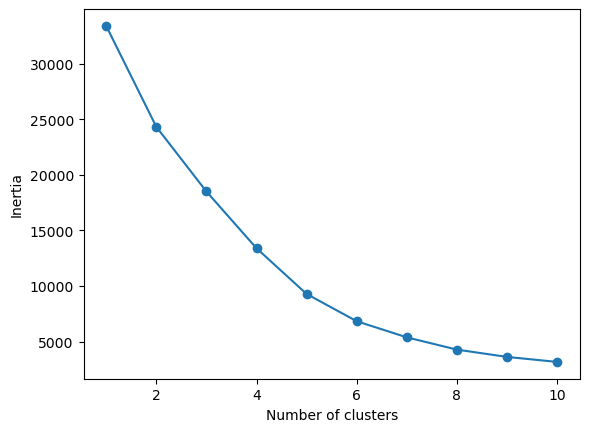

In [32]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
n_cls = 5
km = KMeans(n_clusters=n_cls, n_init=10, random_state=7)
cls = km.fit_predict(dfX_scaled)
print(cls[0])

1


In [34]:
df_40['cluster_no'] = cls
display(df_40.head())

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代,cluster_no
0,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ,1,40,1
1,3,1,9,1616,90,30,3,11,農産,1113,野菜,111319,キュウリ,2,40,2
2,3,1,9,1616,130,65,2,20,飲料,2012,清涼飲料,201214,炭酸飲料,2,40,1
3,3,1,9,1616,75,75,1,11,農産,1113,野菜,111356,もやし,2,40,1
4,3,1,9,1616,85,85,1,11,農産,1113,野菜,111361,レタス,2,40,1


In [35]:
print(df_40['cluster_no'].value_counts())

cluster_no
1    12593
0     3428
2      533
4      154
3        1
Name: count, dtype: int64


c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31246 (\N{CJK UNIFIED IDEOGRAPH-7A0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25244 (\N{CJK UNIFIED IDEOGRAPH-629C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\iniad\miniconda3\envs\ds2025\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4

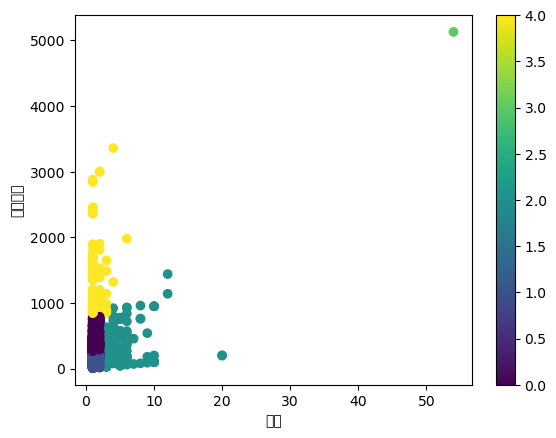

In [36]:
plt.scatter(df_40['個数'], df_40['税抜価格'], 
            marker='o', c=df_40['cluster_no'])
plt.colorbar()
plt.xlabel('個数')
plt.ylabel('税抜価格')
plt.show()